Saving student_dropout.csv to student_dropout (4).csv
First 5 rows:
   attendance    grades  participation dropout_risk
0          78  6.563552              6           no
1          91  6.166674              7          yes
2          68  9.689376              0           no
3          54  8.756271              5          yes
4          82  7.978561              7           no

Missing values:
attendance       0
grades           0
participation    0
dropout_risk     0
dtype: int64

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.77      0.71        13
           1       0.40      0.29      0.33         7

    accuracy                           0.60        20
   macro avg       0.53      0.53      0.52        20
weighted avg       0.57      0.60      0.58        20

Model Accuracy: 0.60


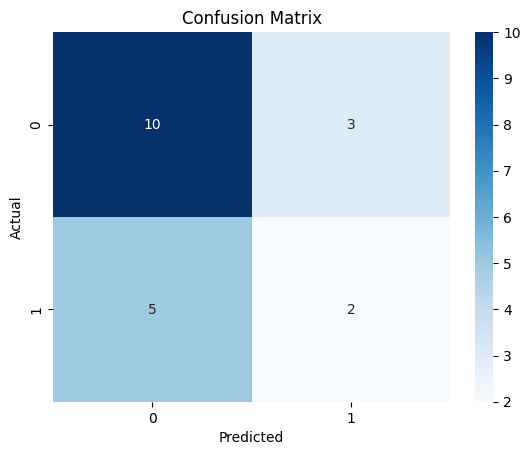


--- Predict Dropout Risk for a New Student ---
Enter attendance (0-100): 65
Enter grades (0-10): 5
Enter participation score (0-10): 10

Prediction for this student: ❌ At Risk of Dropping Out


In [6]:
# Step 1: Upload the dataset
from google.colab import files
uploaded = files.upload()

import pandas as pd
import io

# Load the uploaded file
filename = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[filename]))

# Step 2: Preview the data
print("First 5 rows:")
print(df.head())

# Step 3: Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Step 4: Preprocess columns
features = ['attendance', 'grades', 'participation']
target = 'dropout_risk'

# Convert target to numeric
df[target] = df[target].map({'yes': 1, 'no': 0})

# Step 5: Train/test split
from sklearn.model_selection import train_test_split
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Train Decision Tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Step 7: Predict and evaluate
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred = model.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {acc:.2f}")

# Confusion Matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Step 8: Manually enter student data to test
print("\n--- Predict Dropout Risk for a New Student ---")
attendance = float(input("Enter attendance (0-100): "))
grades = float(input("Enter grades (0-10): "))
participation = float(input("Enter participation score (0-10): "))

new_student = pd.DataFrame([[attendance, grades, participation]], columns=features)
prediction = model.predict(new_student)[0]

result = "❌ At Risk of Dropping Out" if prediction == 1 else "✅ Not at Risk"
print("\nPrediction for this student:", result)
